首先，我们从 sklearn.datasets 中导入波士顿房屋数据集。然后，我们将数据集拆分为特征矩阵 X 和目标变量 y。接下来，我们使用 train_test_split 函数将数据集划分为训练集和测试集。

然后，我们初始化Lasso回归模型，并使用训练集进行训练。我们选择 alpha 参数值为 1.0。

训练完成后，我们使用训练好的模型对测试集进行预测，并计算预测结果与真实标签之间的均方误差（MSE）。

最后，我们绘制了Lasso回归模型的特征系数变化图。根据系数的绝对值大小，我们可以了解到哪些特征对预测模型的影响更大。

https://www.ml-zhuang.club/3323/224/

In [2]:
# 导入需要的库和模块
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 加载波士顿房屋数据集
boston_df = pd.read_csv('./data/1_boston_housing.csv')
# 分离特征和目标变量 
X = boston_df.drop('TARGET', axis=1).values
y = boston_df['TARGET']

In [4]:
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 初始化Lasso回归模型
lasso = Lasso(alpha=1.0)

# 训练模型
lasso.fit(X_train, y_train)

# 预测结果
y_pred = lasso.predict(X_test)

均方误差： 24.409489761299707


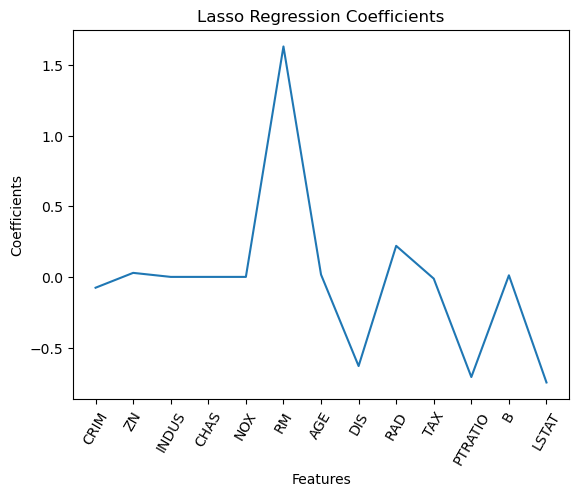

In [8]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("均方误差：", mse)

# 绘制特征系数变化图
plt.plot(range(X.shape[1]), lasso.coef_)
plt.xticks(range(X.shape[1]), boston_df.columns[:-1], rotation=60)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()